# Personal Project 1: 
## <font color='red'>IEEE Computational Intelligence Society Fraud Detection</font> [(Kaggle)](https://www.kaggle.com/c/ieee-fraud-detection/overview)

#### `(2/2/2022 -        )`
#### Jey Kim (jeonghyeop.kim@gmail.com)

Vesta Corporation provided the dataset for this competition



## <font color='blue'> STEP 0: Read Data description carefully</font>
**DATA DESCRIPTION: [link](https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203)**


#### 1. Transaction Table
- TransactionID
- TransactionDT : timedelta from a given reference datetime (not an actual timestamp)
- TransactionAMT: transaction payment amount in USD
- ProductCD: product code, the product for each transaction
- card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
- addr: address
- dist: distance
- P_ and (R__) emaildomain: purchaser and recipient email domain
- C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
- D1-D15: timedelta, such as days between previous transaction, etc.
- M1-M9: match, such as names on card and address, etc.
- Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

Categorical features:
- ProductCD
- card1-card6
- addr1, addr2
- P_emaildomain
- R_emaildomain
- M1-M9

#### 2. Identity Table

- TransactionID
- id_01-38 
> (network: IP,ISP,Proxy,etc; digital signature: UA,browser, os, version,etc)
- DeviceType
- DeviceInfo

Categorical Features:
- DeviceType
- DeviceInfo
- id_12 - id_38

## <font color='blue'> STEP 1: Import libraries & Read data sets</font>

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load data sets
datapath="~/main/kaggle/ieee_cis_fraud/"

file_train_transaction="train_transaction.csv"
file_train_identity="train_identity.csv"

file_test_transaction="test_transaction.csv"
file_test_identity="test_identity.csv"


df_transaction=pd.read_csv(datapath+file_train_transaction)
df_identity=pd.read_csv(datapath+file_train_identity)

df_transaction_test=pd.read_csv(datapath+file_test_transaction)
df_identity_test=pd.read_csv(datapath+file_test_identity)

## <font color='blue'> STEP 2: Perform Exploratory Data Analysis (EDA) </font>

"EDA is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. ...to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. ...EDA is different from initial data analysis (IDA), which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed. EDA encompasses IDA." [wikipedia](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

### <font color='blue'>STEP 2-a: the entire data set</font>

In [3]:
df_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
print(df_transaction.shape, df_identity.shape)

(590540, 394) (144233, 41)


#### Merge the two tables (left) by TransactionID

In [6]:
df_train = df_transaction.merge(df_identity, how='left', on='TransactionID')

In [7]:
df_train.shape # 394 + 41 - 1 (Join with `TransactionID`)

(590540, 434)

In [8]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [9]:
#pd.set_option('display.max_columns', 10)
pd.set_option('display.max_columns', None)

In [10]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

##### TransactionDT : in second. 
**86400(sec) =24 (hr) x 60 (min/hr) x 60 (sec/min)**
##### C: Counting something (actual meaning was masked)
##### D: Delta time from the previous transaction
##### M: Matching with some information
##### V: Vesta's engineered features

#### How many unique values for each column?

In [11]:
for col, values in df_train.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))

TransactionID: 590540
isFraud: 2
TransactionDT: 573349
TransactionAmt: 20902
ProductCD: 5
card1: 13553
card2: 500
card3: 114
card4: 4
card5: 119
card6: 4
addr1: 332
addr2: 74
dist1: 2651
dist2: 1751
P_emaildomain: 59
R_emaildomain: 60
C1: 1657
C2: 1216
C3: 27
C4: 1260
C5: 319
C6: 1328
C7: 1103
C8: 1253
C9: 205
C10: 1231
C11: 1476
C12: 1199
C13: 1597
C14: 1108
D1: 641
D2: 641
D3: 649
D4: 808
D5: 688
D6: 829
D7: 597
D8: 12353
D9: 24
D10: 818
D11: 676
D12: 635
D13: 577
D14: 802
D15: 859
M1: 2
M2: 2
M3: 2
M4: 3
M5: 2
M6: 2
M7: 2
M8: 2
M9: 2
V1: 2
V2: 9
V3: 10
V4: 7
V5: 7
V6: 10
V7: 10
V8: 9
V9: 9
V10: 5
V11: 6
V12: 4
V13: 7
V14: 2
V15: 8
V16: 15
V17: 16
V18: 16
V19: 8
V20: 15
V21: 6
V22: 9
V23: 14
V24: 14
V25: 7
V26: 13
V27: 4
V28: 4
V29: 6
V30: 8
V31: 8
V32: 15
V33: 7
V34: 13
V35: 4
V36: 6
V37: 55
V38: 55
V39: 16
V40: 18
V41: 2
V42: 9
V43: 9
V44: 49
V45: 49
V46: 7
V47: 9
V48: 6
V49: 6
V50: 6
V51: 7
V52: 9
V53: 6
V54: 7
V55: 18
V56: 52
V57: 7
V58: 11
V59: 17
V60: 17
V61: 7
V62: 11
V63: 8
V

#### Are there nan values ?

In [12]:
df_train.isnull().sum().sum() # the entire number of nan values in the merged table

115523073

In [13]:
## Function for Missing Values Information
def missing_info(df):
    na_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = n_miss/df.shape[0]*100
    df_missing_info = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    return df_missing_info

In [14]:
pd.set_option('display.max_rows', None)
missing_info(df_train)

,n_miss,ratio
id_24,585793,99.20
id_25,585408,99.13
id_07,585385,99.13
id_08,585385,99.13
id_21,585381,99.13
id_26,585377,99.13
id_27,585371,99.12
id_23,585371,99.12
id_22,585371,99.12
dist2,552913,93.63


In [15]:
print(df_train.dtypes)

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
card1               int64
card2             float64
card3             float64
card4              object
card5             float64
card6              object
addr1             float64
addr2             float64
dist1             float64
dist2             float64
P_emaildomain      object
R_emaildomain      object
C1                float64
C2                float64
C3                float64
C4                float64
C5                float64
C6                float64
C7                float64
C8                float64
C9                float64
C10               float64
C11               float64
C12               float64
C13               float64
C14               float64
D1                float64
D2                float64
D3                float64
D4                float64
D5                float64
D6                float64
D7                float64
D8          

In [16]:
## A nice function that can be used in the beginning
def check_df(df, head=5):
    print("##################### Shape #####################")
    print(df.shape)

    print("##################### Types #####################")
    print(df.dtypes)

    print("##################### Head #####################")
    print(df.head(head))

    print("##################### NA #####################")
    print(df.isnull().sum())

### <font color='blue'>STEP 2-b: the target feature</font>

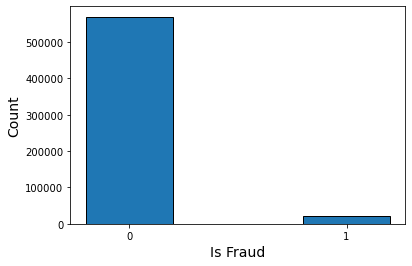

The rate of fraud transactions is 3.50 %


In [17]:
n_fraud=sum(df_train.iloc[:,1].values==1)
n_normal=sum(df_train.iloc[:,1].values==0)
rate_fraud=n_fraud/(n_fraud+n_normal)*100

fig, ax  = plt.subplots(figsize=(6, 4))
ax.hist(df_train.iloc[:,1].values, bins=[-0.2,0.2,0.8,1.2], ec="k")
ax.set_xticks((0,1))
ax.set_xlabel('Is Fraud', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()
print("The rate of fraud transactions is %.2f %%" %rate_fraud)

### Seaborn is a nice library. Try it

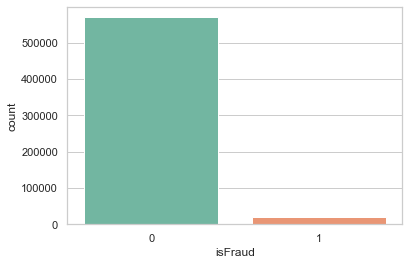

In [18]:
sns.set_theme(style="whitegrid")
ax=sns.countplot(x="isFraud", data=df_train, palette="Set2") #countplot is for categorical values
plt.show()

### <font color='blue'>STEP 2-c: the continuous features</font>

**STEP 2-c-1: TransactionDT**

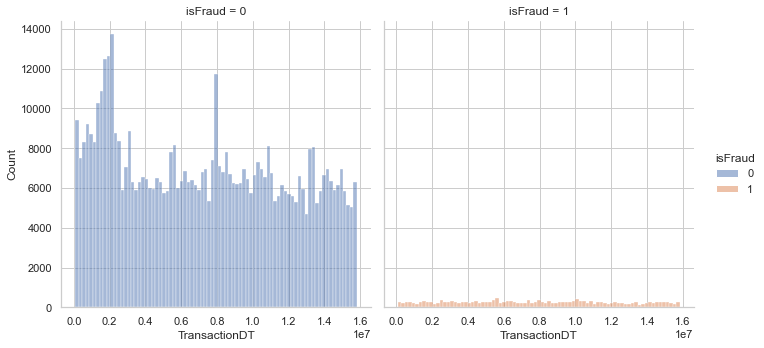

In [29]:
sns.displot(data=df_train, x="TransactionDT", col="isFraud",hue="isFraud")
plt.show()

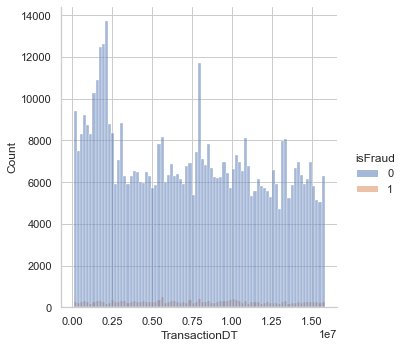

In [36]:
sns.displot(data=df_train, x="TransactionDT",hue="isFraud")
plt.show()

**STEP 2-c-2: TransactionAmt**

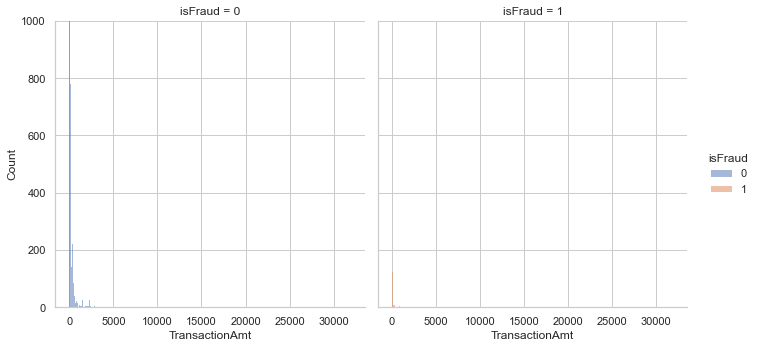

In [60]:
sns.displot(data=df_train, x="TransactionAmt", col="isFraud",hue="isFraud")
plt.ylim(0, 1000)
plt.show()

In [33]:
df_train['TransactionAmt'].describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

In [40]:
df_fraud = df_train[df_train['isFraud']== 1]
df_fraud['TransactionAmt'].describe()

count    20663.000000
mean       149.244779
std        232.212163
min          0.292000
25%         35.044000
50%         75.000000
75%        161.000000
max       5191.000000
Name: TransactionAmt, dtype: float64

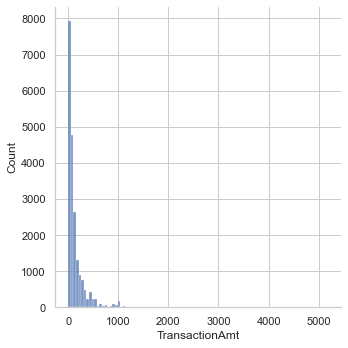

In [57]:
sns.displot(data=df_fraud, x="TransactionAmt", bins=100)
plt.show()

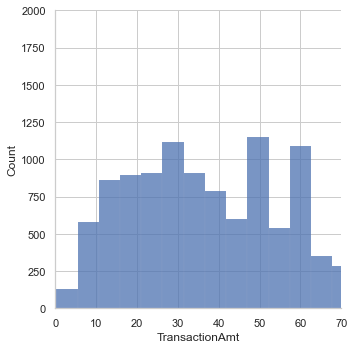

In [77]:
## Fraud $0-$70

sns.displot(data=df_fraud, x="TransactionAmt",bins=1000)
plt.ylim(0, 2000)
plt.xlim(0,70)
plt.show()

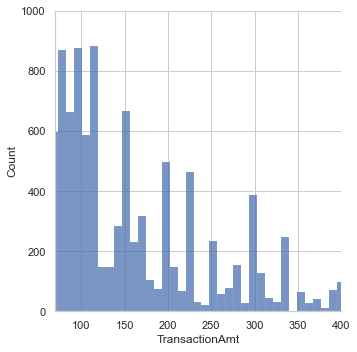

In [70]:
## Fraud $70-$400

sns.displot(data=df_fraud, x="TransactionAmt")
plt.ylim(0, 1000)
plt.xlim(70,400)
plt.show()

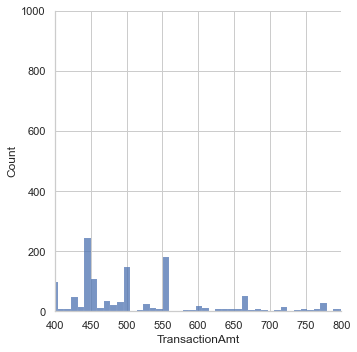

In [62]:
## Fraud $400-$800

sns.displot(data=df_fraud, x="TransactionAmt")
plt.ylim(0, 1000)
plt.xlim(400,800)
plt.show()

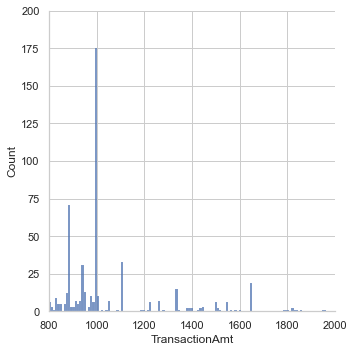

In [66]:
## Fraud $800-$2000

sns.displot(data=df_fraud, x="TransactionAmt")
plt.ylim(0, 200)
plt.xlim(800,2000)
plt.show()

In [104]:
total_num_fraud=len(df_fraud)
Fraud_transctionAmt_int=df_fraud.TransactionAmt.values.astype(int)
isInt_fraud=(Fraud_transctionAmt_int==df_fraud.TransactionAmt.values)
int_num_fraud=sum(isInt_fraud)
perc=round(int_num_fraud/total_num_fraud,3)*100 
print("%% of fraud transaction amount that is integer = %f" %perc)

% of fraud transaction amount that is integer = 52.700000


In [105]:
total_num_all=len(df_train)
all_transctionAmt_int=df_train.TransactionAmt.values.astype(int)
isInt_all=(all_transctionAmt_int==df_train.TransactionAmt.values)
int_num_all=sum(isInt_all)
perc=round(int_num_all/total_num_all,3)*100
print("%% of all transaction amount that is integer = %f" %perc)

% of all transaction amount that is integer = 51.600000


In [111]:
df_normal = df_train[df_train['isFraud']== 0]
total_num_normal=len(df_normal)
normal_transctionAmt_int=df_normal.TransactionAmt.values.astype(int)
isInt_normal=(normal_transctionAmt_int==df_normal.TransactionAmt.values)
int_num_normal=sum(isInt_normal)
perc=round(int_num_normal/total_num_normal,3)*100
print("%% of normal transaction amount that is integer = %f" %perc)

% of normal transaction amount that is integer = 51.600000


In [116]:
df_fraud_99 = df_train[(df_train['isFraud']== 1) & (df_train['TransactionAmt'] > 99)]
total_num_fraud=len(df_fraud_99)
fraud_transctionAmt_int=df_fraud_99.TransactionAmt.values.astype(int)
isInt_fraud=(fraud_transctionAmt_int==df_fraud_99.TransactionAmt.values)
int_num_fraud=sum(isInt_fraud)
perc=round(int_num_fraud/total_num_fraud,3)*100
print("%% of fraud transaction amount that is integer and larger than $99 = %f" %perc)

% of fraud transaction amount that is integer and larger than $99 = 78.300000


In [117]:
df_normal = df_train[(df_train['isFraud']== 0) & (df_train['TransactionAmt'] > 99)]
total_num_normal=len(df_normal)
normal_transctionAmt_int=df_normal.TransactionAmt.values.astype(int)
isInt_normal=(normal_transctionAmt_int==df_normal.TransactionAmt.values)
int_num_normal=sum(isInt_normal)
perc=round(int_num_normal/total_num_normal,3)*100
print("%% of normal transaction amount that is integer and larger than $99 = %f" %perc)

% of normal transaction amount that is integer and larger than $99 = 59.300000


### <font color='blue'>STEP 2-d: the categorical features</font>

### <font color='blue'>STEP 2-e: the group features</font>